In [1]:
!pip install -U imbalanced-learn scikit-learn
!pip install --upgrade scikit-learn imbalanced-learn
import numpy as np
import pandas as pd
import os
import tweepy as tw
import re    # it is RegEx useed to remove non-letter characters
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"


!pip install emoji

!pip install tweepy

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### The raw dataset and head() of raw data is also not provided in the github repository to ensure user privacy.

In [2]:
path='merged_dataset.csv'   
df1=pd.read_csv(path)

In [4]:
# Number of records in the dataset
row_count = df1.shape
print("Number of Records in the raw dataset: ",row_count)

Number of Records in the raw dataset:  (959491, 14)


0         495
1         367
2         387
3         250
4         223
         ... 
959486     10
959487      8
959488     15
959489      1
959490      1
Name: ReviewCharLength, Length: 959491, dtype: int64


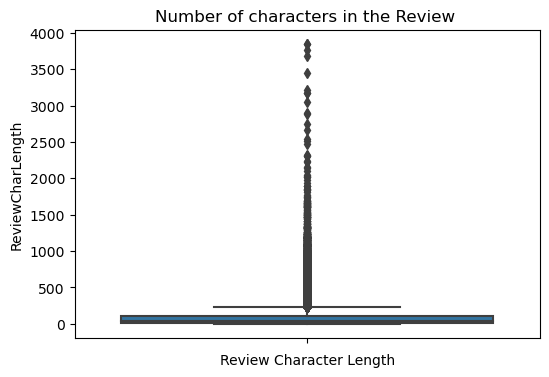

In [5]:
df1['content'] = df1['content'].astype(str)
# Calculate the length of each review
df1['ReviewCharLength'] = df1['content'].apply(len)

print(df1['ReviewCharLength'])
# Plot a box plot for review lengths
plt.figure(figsize=(6, 4))
sns.boxplot(y=df1['ReviewCharLength'])
plt.title('Number of characters in the Review ')
plt.xlabel('Review Character Length')
plt.show()

/Users/kashish/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kashish/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kashish/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


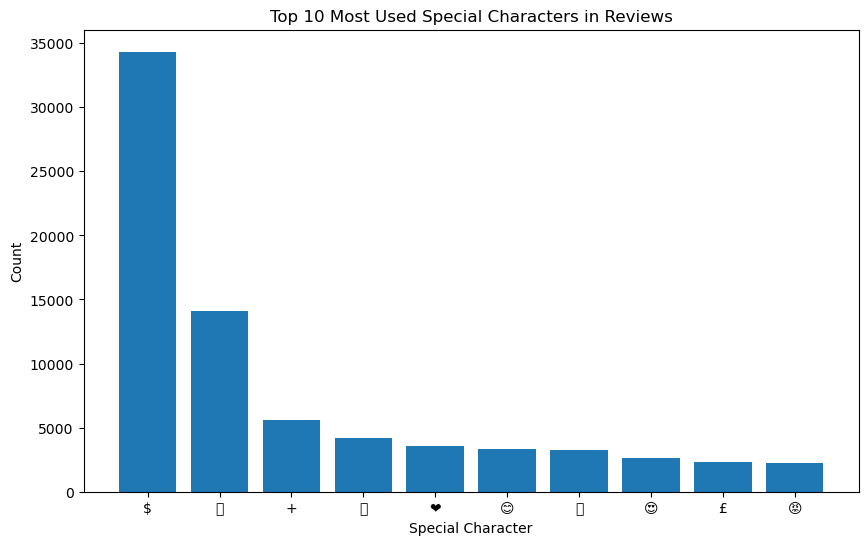

The special character with the highest count is '$' with a count of 34334
Top 10 Special Characters:
$: 34334
👍: 14128
+: 5573
👌: 4162
❤: 3563
😊: 3325
👎: 3268
😍: 2602
£: 2332
😡: 2230


In [6]:
import pandas as pd
import regex
from collections import Counter
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
# Function to extract special characters from text
def extract_special_characters(text):
    special_characters_list = []
    special_characters_pattern = regex.compile(r'\p{S}')
    special_characters = special_characters_pattern.findall(text)
    for char in special_characters:
        special_characters_list.append(char)
    return special_characters_list

# Apply the function to the "content" column in the 'df1' dataframe
df1['special_characters'] = df1['content'].apply(extract_special_characters)

# Flatten the list of special characters
flat_special_characters_list = [item for sublist in df1['special_characters'] for item in sublist]

# Count the occurrences of each special character
special_character_counts = dict(Counter(flat_special_characters_list))

# Sort the special characters by count
sorted_special_characters = dict(sorted(special_character_counts.items(), key=lambda item: item[1], reverse=True))

# Get the top 10 most used special characters
top_10_special_characters = dict(list(sorted_special_characters.items())[:10])

# Plot the top 10 most used special characters
plt.figure(figsize=(10, 6))
plt.bar(top_10_special_characters.keys(), top_10_special_characters.values())
plt.title('Top 10 Most Used Special Characters in Reviews')
plt.xlabel('Special Character')
plt.ylabel('Count')
plt.show()

# Find the special character with the highest count
highest_count_character = max(special_character_counts, key=special_character_counts.get)
highest_count = special_character_counts[highest_count_character]

# Display the result
print(f"The special character with the highest count is '{highest_count_character}' with a count of {highest_count}")

# Display all top 10 characters and their counts
print("Top 10 Special Characters:")
for char, count in top_10_special_characters.items():
    print(f"{char}: {count}")


In [7]:
# Number of records in the dataset
row_count = df1.shape
print("Number of Records in the raw dataset: ",row_count)



Number of Records in the raw dataset:  (959491, 16)


In [8]:
#Checking the number of null values before the removal of null values in content

print("The number of null values in the Dataset:\n",df1.isnull().sum())

The number of null values in the Dataset:
 Unnamed: 0               75633
reviewId                     0
userName                     4
userImage                    0
content                      0
score                        0
thumbsUpCount                0
reviewCreatedVersion    111123
at                           0
replyContent            821314
repliedAt               821314
appVersion              111123
AppName                      0
App Domain                   0
ReviewCharLength             0
special_characters           0
dtype: int64


In [9]:
#Removing the null values in the userName Column
df1.dropna(subset=['userName'], inplace=True)

In [10]:
#Checking the number of null values before the removal of null values in content

print("The number of null values in the Dataset:\n",df1.isnull().sum())

The number of null values in the Dataset:
 Unnamed: 0               75632
reviewId                     0
userName                     0
userImage                    0
content                      0
score                        0
thumbsUpCount                0
reviewCreatedVersion    111123
at                           0
replyContent            821311
repliedAt               821311
appVersion              111123
AppName                      0
App Domain                   0
ReviewCharLength             0
special_characters           0
dtype: int64


In [11]:
# Sort by 'at'
df1= df1.sort_values('at')

# Forward fill 'appVersion'
df1['appVersion'] = df1['appVersion'].ffill()

# Backward fill 'appVersion' for remaining null values
df1['appVersion'] = df1['appVersion'].bfill()

print(df1['appVersion'])
print("The above values are the filled App version values  ")

400594       2.586
400196      5.0.14
400195      5.0.14
400194      5.0.14
400193      5.0.14
            ...   
391758    10.12.19
391757    10.12.19
391074    10.21.67
391073    10.21.67
391072    10.21.67
Name: appVersion, Length: 959487, dtype: object
The above values are the filled App version values  


In [12]:
# Sort by 'at'
df1 = df1.sort_values('at')

# Forward fill 'appVersion'
df1['reviewCreatedVersion'] = df1['reviewCreatedVersion'].ffill()

# Backward fill 'appVersion' for remaining null values
df1['reviewCreatedVersion'] = df1['reviewCreatedVersion'].bfill()

print(df1['reviewCreatedVersion'])
print("The above values are the filled reviewCreated Version values  ")

400594       2.586
400196      5.0.14
400195      5.0.14
400194      5.0.14
400193      5.0.14
            ...   
391758    10.12.19
391757    10.12.19
391074    10.21.67
391073    10.21.67
391072    10.21.67
Name: reviewCreatedVersion, Length: 959487, dtype: object
The above values are the filled reviewCreated Version values  


In [13]:
#Checking the number of null values before the removal of null values in content

print("The number of null values in the Dataset:\n",df1.isnull().sum())


The number of null values in the Dataset:
 Unnamed: 0               75632
reviewId                     0
userName                     0
userImage                    0
content                      0
score                        0
thumbsUpCount                0
reviewCreatedVersion         0
at                           0
replyContent            821311
repliedAt               821311
appVersion                   0
AppName                      0
App Domain                   0
ReviewCharLength             0
special_characters           0
dtype: int64


In [14]:
# Impute missing text with a default NA value
df1.fillna('NA', inplace=True)

In [15]:
#Checking the null values after the removal
df1.isnull().sum()

Unnamed: 0              0
reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
AppName                 0
App Domain              0
ReviewCharLength        0
special_characters      0
dtype: int64

In [16]:
# Count the number of rows left after removing the null values in Review content column
row_count = df1.shape[0]
print("The number of records left after removing all the null values:", row_count)

The number of records left after removing all the null values: 959487


In [17]:
#Checking if there duplicates in the review id column to verify whether to consider the removal of duplicate column
print("Number of duplicates in the ReviewidColumn: ",len(df1['reviewId'])-len(df1['reviewId'].drop_duplicates()))

Number of duplicates in the ReviewidColumn:  30931


In [18]:
# Drop duplicates based on a particular column
df_no_duplicates = df1.drop_duplicates(subset='reviewId',inplace=True)
print("The number of duplicates left: ",df_no_duplicates)

The number of duplicates left:  None


In [19]:
# Count the number of rows left after removing the null values in Review content column
row_count = df1.shape[0]
print("The number of records  after removing duplicates in the review id column: ",row_count)

The number of records  after removing duplicates in the review id column:  928556


In [20]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Apply the function to the "content" column
df1['content'] = df1['content'].apply(remove_emoji)

In [21]:
# Filter the DataFrame to include only rows with emoji
emoji_rows = df1[df1['content'] == True]

# Print the rows with emoji
print(emoji_rows)

Empty DataFrame
Columns: [Unnamed: 0, reviewId, userName, userImage, content, score, thumbsUpCount, reviewCreatedVersion, at, replyContent, repliedAt, appVersion, AppName, App Domain, ReviewCharLength, special_characters]
Index: []


In [22]:
# Function to remove special characters from text and replace with a space
def remove_special_characters(text):
    # Define a regular expression pattern to match special characters
    special_characters_pattern = r':'

    # Use re.sub to replace matched special characters with a space
    cleaned_text = re.sub(special_characters_pattern, ' ', text)

    return cleaned_text

# Apply the function to remove special characters and replace with spaces
df1['content'] = df1['content'].apply(remove_special_characters)

In [23]:
# Filter rows with non-empty 'removed_characters' lists (indicating special characters were removed)
df1 = df1[df1['content'].str.len() > 0]

# Display the filtered DataFrame
print(df1['content'])

400594                  Excellent app so easy to book a cab
400196                        Easy to use and great service
400195                                               Great!
400194    This app is awesome for $10 anywhere in Manhat...
400193    Бонусные 300р за первую поездку можно использо...
                                ...                        
391758    Searched for way over a hour for a taxi, only ...
391757    Avoid at all costs. 4 mile trip, quoted a mini...
391074    This app - and the service behind - fails in a...
391073                                          Thank you !
391072    אפליקציה מעולה, הנהגים פחות. הם מקבלים את הנסי...
Name: content, Length: 923064, dtype: object


In [24]:
# Count the number of rows left after removing the null values in Review content column
row_count = df1.shape
print("The number of records after Data Cleaning ", row_count)

The number of records after Data Cleaning  (923064, 16)


In [25]:
def classify_score(value):
    if value <3:
        return -1
    elif value == 3:
        return 0
    elif value >3:
        return 1

df1['category'] = df1['score'].apply(classify_score)

df1['category'].value_counts()

category
 1    650720
-1    232637
 0     39707
Name: count, dtype: int64

In [26]:
df1['category'] = df1['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df1.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,AppName,App Domain,ReviewCharLength,special_characters,category
400594,9995.0,a7363846-8aa0-4ea4-a8b0-5429cba055b9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent app so easy to book a cab,5,0,2.586,01-01-2014 10:05,NA,NA,2.586,gett_taxi,Car Ride,35,[],Positive
400196,9597.0,74131d3c-0ba1-42bc-95b8-92ccd95c4fc1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Easy to use and great service,5,7,5.0.14,01-01-2015 01:08,NA,NA,5.0.14,gett_taxi,Car Ride,29,[],Positive
400195,9596.0,e52aca06-a9de-483d-8f93-ba8a675ec9a7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great!,5,0,5.0.14,01-01-2015 10:13,NA,NA,5.0.14,gett_taxi,Car Ride,6,[],Positive
400194,9595.0,0a33a4b8-1177-4702-b1fd-cc3098f6c628,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is awesome for $10 anywhere in Manhat...,5,0,5.0.14,01-01-2015 11:03,NA,NA,5.0.14,gett_taxi,Car Ride,127,"[$, $]",Positive
400193,9594.0,7c05a5fb-f80f-420c-9903-3df60825aa2c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Бонусные 300р за первую поездку можно использо...,2,0,5.0.14,01-01-2015 14:37,NA,NA,5.0.14,gett_taxi,Car Ride,77,[],Negative


In [27]:
# Count the number of rows left after removing the null values in Review content column
row_count = df1.shape
print("The number of records  after removing duplicates in the review id column: ",row_count)

The number of records  after removing duplicates in the review id column:  (923064, 17)


In [28]:
# English alphabets
english_alphabets = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"

# Function to check if the string starts with an English character
def starts_with_english(s):
    if isinstance(s, str):
        words = s.split()
        if words:
            return words[0][0] in english_alphabets
    return False

# Ensure 'content' column exists
if 'content' in df1.columns:
    # Filtering the DataFrame
    df1 = df1[df1['content'].apply(starts_with_english)]

# Displaying the first few rows of the filtered DataFrame
    print(df1.head())
else:
    print("The 'content' column does not exist in the DataFrame.")


       Unnamed: 0                              reviewId       userName  \
400594     9995.0  a7363846-8aa0-4ea4-a8b0-5429cba055b9  A Google user   
400196     9597.0  74131d3c-0ba1-42bc-95b8-92ccd95c4fc1  A Google user   
400195     9596.0  e52aca06-a9de-483d-8f93-ba8a675ec9a7  A Google user   
400194     9595.0  0a33a4b8-1177-4702-b1fd-cc3098f6c628  A Google user   
400192     9593.0  3dab83c0-8d5d-4100-bb83-2487e2ceb588  A Google user   

                                                userImage  \
400594  https://play-lh.googleusercontent.com/EGemoI2N...   
400196  https://play-lh.googleusercontent.com/EGemoI2N...   
400195  https://play-lh.googleusercontent.com/EGemoI2N...   
400194  https://play-lh.googleusercontent.com/EGemoI2N...   
400192  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                  content  score  \
400594                Excellent app so easy to book a cab      5   
400196                      Easy to use and great se

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK data is downloaded
nltk_data = ['punkt', 'wordnet', 'stopwords']
for data in nltk_data:
    nltk.download(data, quiet=True)

def tweet_to_words(tweet):
    if not isinstance(tweet, str):
        return []  # Return an empty list for non-string input

    # Lowercase the text
    text = tweet.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
    
    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return the processed list of words
    return tokens

# Apply the function to the 'content' column
df1['processed_content'] = df1['content'].apply(tweet_to_words)

# Assuming df1 is your DataFrame and 'content' is the column with text data
print("\nOriginal review ->", df1['content'][5])
print("\nProcessed review ->", df1['processed_content'][5])

# Applying data processing to individual data
X = list(map(tweet_to_words, df1['content']))

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(df1['category'])

# Displaying the processed content and category for the 5th row
print(X[5])
print(Y[5])



Original review -> Convenience and easy to find flight with cheap and best options. Would be great if you could integrate public holiday and school holidays into the calendar when selecting the travel time.

Processed review -> ['convenience', 'easy', 'find', 'flight', 'cheap', 'best', 'option', 'would', 'great', 'could', 'integrate', 'public', 'holiday', 'school', 'holiday', 'calendar', 'selecting', 'travel', 'time']
['best']
2


In [30]:
# Number of records in the dataset
row_count = df1.shape
print("Number of Records after Data Transformation ",row_count)

Number of Records after Data Transformation  (905494, 18)


In [31]:
df1.dtypes

Unnamed: 0              object
reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
AppName                 object
App Domain              object
ReviewCharLength         int64
special_characters      object
category                object
processed_content       object
dtype: object

In [32]:
# Convert date to a standard format (e.g., YYYY-MM-DD)
df1['at'] = pd.to_datetime(df1['at'], errors='coerce')  # 'coerce' will set invalid parsing as NaT

In [33]:
df1.dtypes

Unnamed: 0                      object
reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt                       object
appVersion                      object
AppName                         object
App Domain                      object
ReviewCharLength                 int64
special_characters              object
category                        object
processed_content               object
dtype: object

In [34]:
#Handling HTML Tags (if applicable)
df1['content'] = df1['content'].str.replace('<[^<]+?>', '', regex=True)


In [35]:
def has_html_tags(text):
    # Define a regular expression pattern for HTML tags
    html_tags_pattern = re.compile(r'<.*?>')

    # Use findall to get all matches of the pattern in the text
    html_tags = re.findall(html_tags_pattern, text)

    # Check if any HTML tags were found
    return bool(html_tags)

# Apply the function to each row of the DataFrame
df1['has_html_tags'] = df1['content'].apply(has_html_tags)

# Display the DataFrame
print("Is there any HTML Tags in the Text?:\n",df1['has_html_tags'])

Is there any HTML Tags in the Text?:
 400594    False
400196    False
400195    False
400194    False
400192    False
          ...  
391759    False
391758    False
391757    False
391074    False
391073    False
Name: has_html_tags, Length: 905494, dtype: bool


In [36]:
#Check for mismatched ratings and comments (where we have a 5-point rating scale)
df1['rating_comment_mismatch'] = df1.apply(
    lambda row: (row['score'] > 3 and 'worst' in row['content']) or
                (row['score'] < 3 and 'good' in row['content']), axis=1)

In [37]:
#To check the count of rating mismatch
print("The number of mismatch between the Review content and Reviewer Score:",df1['rating_comment_mismatch'].value_counts()[True])

The number of mismatch between the Review content and Reviewer Score: 8469


In [38]:
# Number of records in the dataset
row_count = df1.shape
print("Number of Records after Data Transformation ",row_count)

Number of Records after Data Transformation  (905494, 20)


In [39]:
# Impute missing text with a default NA value
df1.fillna('NA', inplace=True)

In [40]:
df1.isnull().sum()

Unnamed: 0                 0
reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion       0
at                         0
replyContent               0
repliedAt                  0
appVersion                 0
AppName                    0
App Domain                 0
ReviewCharLength           0
special_characters         0
category                   0
processed_content          0
has_html_tags              0
rating_comment_mismatch    0
dtype: int64

In [41]:
from sklearn.preprocessing import MinMaxScaler
df1['ReviewCharLength'] = df1['content'].apply(len)
scaler = MinMaxScaler()
df1[['thumbsUpCount', 'ReviewCharLength']] = scaler.fit_transform(df1[['thumbsUpCount', 'ReviewCharLength']])

In [42]:
columns_to_drop = ['Unnamed: 0','reviewId', 'userName', 'userImage', 'replyContent', 'repliedAt','special_characters','rating_comment_mismatch','has_html_tags' ]

reduced_df = df1.drop(columns=columns_to_drop, axis=1)

reduced_df.head()

column_names = reduced_df.columns.tolist()
print(column_names)

['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'appVersion', 'AppName', 'App Domain', 'ReviewCharLength', 'category', 'processed_content']


In [43]:
reduced_df.shape

(905494, 11)

In [44]:
#calculating vocab size to create word corpus
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# Define the tweet processing function
def tweet_to_words(tweet):
    text = tweet.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    words = [PorterStemmer().stem(w) for w in words]
    return words

# Process all tweets and create a list of all words
all_words = []
for tweet in reduced_df['content']:
    if isinstance(tweet, str):
        all_words.extend(tweet_to_words(tweet))

# Determine the vocabulary size
vocabulary_size = len(set(all_words))
print("Total Vocabulary Size:", vocabulary_size)


Total Vocabulary Size: 78907


In [45]:
import pandas as pd
from collections.abc import Iterable  # For checking if the value is an iterable
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to join tokens and handle non-iterable values
def join_tokens(tokens):
    if isinstance(tokens, Iterable) and not isinstance(tokens, str):  # Check if tokens is an iterable but not a string
        return ' '.join(tokens)
    return ''  # Replace non-iterable values with an empty string

# Apply the function to your DataFrame
reduced_df['processed_text'] = reduced_df['processed_content'].apply(join_tokens)

# Example of further code
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(reduced_df['processed_text'])

num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(dtm)

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d:" % (topic_idx + 1)] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topic_dict

# Displaying the top words for each topic
no_top_words = 10
topic_words = display_topics(lda, count_vectorizer.get_feature_names_out(), no_top_words)
print(topic_words)


{'Topic 1:': ['love', 'app', 'nice', 'excellent', 'quick', 'convenient', 'easy', 'super', 'time', 'reliable'], 'Topic 2:': ['app', 'awesome', 'need', 'update', 'location', 'work', 'area', 'working', 'open', 'map'], 'Topic 3:': ['service', 'customer', 'helpful', 'user', 'friendly', 'app', 'bad', 'issue', 'worst', 'perfect'], 'Topic 4:': ['easy', 'use', 'app', 'price', 'work', 'useful', 'simple', 'ok', 'search', 'option'], 'Topic 5:': ['great', 'app', 'fast', 'service', 'amazing', 'deal', 'experience', 'price', 'work', 'choice'], 'Topic 6:': ['good', 'app', 'best', 'like', 'far', 'price', 'apps', 'deal', 'really', 'thank'], 'Topic 7:': ['driver', 'ride', 'lyft', 'time', 'uber', 'minute', 'app', 'money', 'car', 'wait'], 'Topic 8:': ['app', 'flight', 'ca', 'card', 'time', 'phone', 'account', 'number', 'use', 'email'], 'Topic 9:': ['hotel', 'booking', 'airbnb', 'room', 'money', 'agoda', 'book', 'stay', 'app', 'booked'], 'Topic 10:': ['order', 'food', 'delivery', 'time', 'restaurant', 'servi

In [46]:
# Assuming `dtm` is the document-term matrix for the comments
# and `lda` is the trained LDA model
topic_distributions = lda.transform(dtm)

# The indices of topics of interest
topics_of_interest = [7, 4, 8, 1]  # these indices are one less than the topic numbers because of 0-indexing

# Filter the topic distributions to only include the four topics of interest
filtered_distributions = topic_distributions[:, topics_of_interest]

# Get the index of the topic with the max probability for each comment
# The index will correspond to the position in topics_of_interest
topic_indices = filtered_distributions.argmax(axis=1)

# Map the index to the class names
class_names = {0: "app functionality", 1: "customer service", 2: "user friendly", 3: "payment experience"}

# Use the mapping to translate indices to class names
reduced_df['topic_label'] = [class_names[index] for index in topic_indices]

# Now reduced_df will have a new column 'topic_label' with class names as labels


In [47]:
# creating word2vec nad spling the data
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def vectorize_text(word_list, model):
    # Remove out-of-vocabulary words
    word_list = [word for word in word_list if word in model.wv.key_to_index]
    
    # If no words are left in the sentence after filtering, return a zero vector
    if len(word_list) == 0:
        return np.zeros(model.vector_size)
    
    # Compute the average Word2Vec for the remaining words
    word_vectors = [model.wv[word] for word in word_list]
    vectorized_text = np.mean(word_vectors, axis=0)
    return vectorized_text

# Fill NaN values with an empty list in 'processed_content' column
reduced_df['processed_content'] = reduced_df['processed_content'].apply(lambda x: [] if isinstance(x, float) else x)

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=reduced_df['processed_content'], vector_size=100, window=5, min_count=1, workers=4)

# Apply the vectorization function to each row in the DataFrame
X = np.array([vectorize_text(tokens, word2vec_model) for tokens in reduced_df['processed_content']])

# Label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(reduced_df['category'])




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Splitting the data into train, validation, and test sets with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Now, X_train, X_val, X_test, y_train, y_val, and y_test are ready for further use

In [49]:
# Print the shapes of the datasets
print("Training Set Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation Set Shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Test Set Shape (X_test, y_test):", X_test.shape, y_test.shape)



Training Set Shape (X_train, y_train): (724395, 100) (724395,)
Validation Set Shape (X_val, y_val): (90549, 100) (90549,)
Test Set Shape (X_test, y_test): (90550, 100) (90550,)


In [50]:
#displaying word2vec result
# Create a new DataFrame with the vector data
df_vectors = pd.DataFrame(X, columns=[f'vector_{i}' for i in range(X.shape[1])])

# Ensure that the length of reduced_df matches the length of X
if len(reduced_df) == len(X):
    for i in range(X.shape[1]):
        reduced_df[f'vector_{i}'] = X[:, i]

# Print the first few rows
print("First few rows of the DataFrame with Word2Vec vectors:")
df_vectors.head()


First few rows of the DataFrame with Word2Vec vectors:


/var/folders/ly/rtky2zb16z34qxzdhr5g6rxm0000gn/T/ipykernel_17706/2056864346.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  reduced_df[f'vector_{i}'] = X[:, i]
/var/folders/ly/rtky2zb16z34qxzdhr5g6rxm0000gn/T/ipykernel_17706/2056864346.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  reduced_df[f'vector_{i}'] = X[:, i]
/var/folders/ly/rtky2zb16z34qxzdhr5g6rxm0000gn/T/ipykernel_17706/2056864346.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

,vector_0,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_90,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99
0,-0.622932,-0.614061,0.353251,-0.662969,1.302122,-0.662272,1.623627,-0.520460,-0.496635,1.057477,...,-0.577306,-0.178559,-0.434975,-0.936239,-0.881592,0.171142,0.338125,0.285355,0.282759,-0.446799
1,-0.266236,-0.752602,0.218425,0.729899,1.121586,0.176447,1.332617,0.303797,-0.902290,1.094965,...,-0.427490,-0.815889,-0.196273,-0.943165,-0.351427,-0.655767,-0.077273,0.674063,0.020606,-0.920603
2,-2.771326,0.387453,-0.044485,0.686026,1.619579,-0.001892,1.339186,-0.605034,-1.206421,0.520948,...,-0.943030,-0.140151,-0.151959,-1.731853,0.036600,-0.910587,-2.212333,1.073588,-0.698941,-0.134697
3,-0.027754,-0.805020,0.324245,1.020163,-0.046569,-0.324235,0.922441,-0.392187,-0.813908,0.350461,...,-0.530611,-0.307605,-0.656667,0.148543,-0.069829,-0.685955,1.021695,-0.574416,0.070958,0.338696
4,-1.082113,0.053775,-0.134807,0.225807,1.001085,0.424071,0.717633,-0.058960,-0.581260,-0.144710,...,-0.190452,-0.146599,-0.094695,-0.486356,-0.032041,-0.577132,-0.840249,0.371673,-0.679964,0.108627


In [51]:
#standardizing input length of the sentece in model

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 78000
max_len=250

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # Come back sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', reduced_df['content'][5])
X, tokenizer = tokenize_pad_sequences(reduced_df['content'])
print('After Tokenization & Padding \n', X[5])

Before Tokenization & Padding 
 Convenience and easy to find flight with cheap and best options. Would be great if you could integrate public holiday and school holidays into the calendar when selecting the travel time.
After Tokenization & Padding 
 [61  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [53]:
#performing SMOTE analysis
# Assuming X_train, y_train are your training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote are your new training sets with balanced classes

# Displaying the shape of the datasets
print("Original Training Set Shape:", X_train.shape, y_train.shape)
print("SMOTE Resampled Training Set Shape:", X_train_smote.shape, y_train_smote.shape)

Original Training Set Shape: (724395, 100) (724395,)
SMOTE Resampled Training Set Shape: (1542261, 100) (1542261,)


In [54]:
#checking distribution of smote data
import numpy as np

unique, counts = np.unique(y_train_smote, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution in y_train_smote:", class_distribution)

Class distribution in y_train_smote: {0: 514087, 1: 514087, 2: 514087}


# Linear SVM

In [55]:
# Take a sample of 100,000 records from the oversampled data
X_train, X_temp, y_train, y_temp = train_test_split(X_train_smote, y_train_smote, train_size=100000, random_state=42, stratify=y_train_smote)

# Further split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)



In [56]:
# Create SVM model
svm_classifier = SVC(kernel='linear', C=1.0, degree=3, random_state=42)

In [57]:
import time
start_time = time.time()

svm_classifier.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time} seconds")

Training time: 21663.002823114395 seconds


In [58]:
y_train_pred = svm_classifier.predict(X_train)

In [59]:
# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

In [60]:
# Evaluate the model using validation set
train_accuracy= accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Display the evaluation metrics for the validation set
print("Validation Set Metrics:")
print(f'Accuracy: {val_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Validation Set Metrics:
Accuracy: 0.7287
Precision: 0.7320
Recall: 0.7287
F1-score: 0.7299


In [61]:
# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

In [62]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Display the evaluation metrics for the validation set
print("Test Set Metrics:")
print(f'Accuracy: {accuracy_test:.4f}')
print(f'Precision: {precision_test:.4f}')
print(f'Recall: {recall_test:.4f}')
print(f'F1-score: {f1_test:.4f}')

Test Set Metrics:
Accuracy: 0.7274
Precision: 0.7311
Recall: 0.7274
F1-score: 0.7288


# Kernelized SVM

In [63]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, degree=3, random_state=42,max_iter=100000)

In [65]:
import time
start_time = time.time()

# Train the SVM model on the training set
svm_model.fit(X_train_scaled, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time} seconds")

Training time: 1069.93265914917 seconds


In [66]:
y_train_pred = svm_classifier.predict(X_train_scaled)

In [67]:
# Make predictions on the validation set
y_val_pred = svm_model.predict(X_val_scaled)

In [68]:
train_accuracy= accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Display the evaluation metrics for the validation set
print("Validation Set Metrics:")
print(f'Accuracy: {val_accuracy:.4f}')
print(f'Precision: {val_precision:.4f}')
print(f'Recall: {val_recall:.4f}')
print(f'F1-score: {val_f1:.4f}')

Validation Set Metrics:
Accuracy: 0.7714
Precision: 0.7697
Recall: 0.7714
F1-score: 0.7702


In [69]:
# Make predictions on the test set
y_test_pred = svm_model.predict(X_test_scaled)

In [70]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
# Display the evaluation metrics for the validation set
print("Test Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1-score: {test_f1:.4f}')

Test Set Metrics:
Accuracy: 0.7708
Precision: 0.7693
Recall: 0.7708
F1-score: 0.7698


In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualize the Performance Metrics

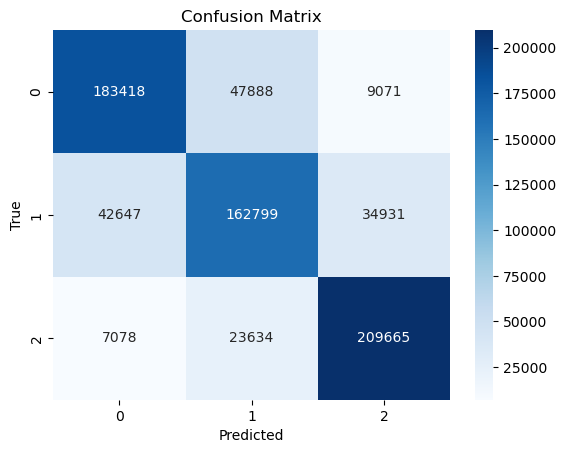

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


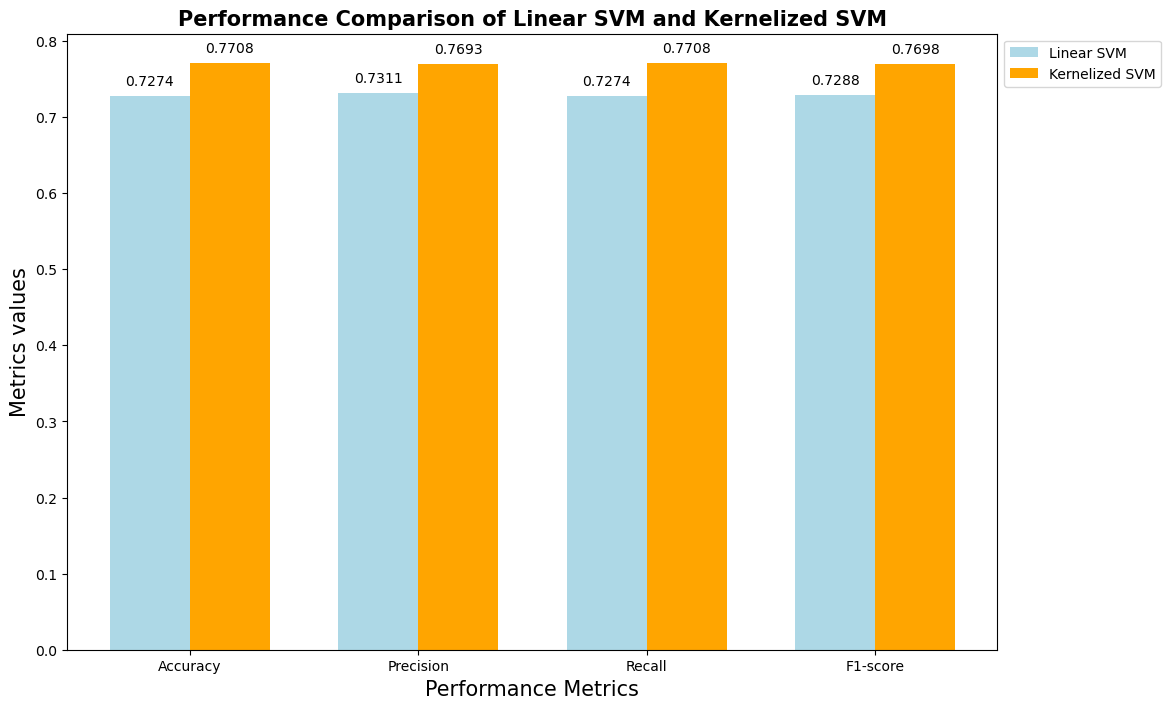

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated accuracy, precision, recall, and f1 variables for both models (linear SVM and kernelized SVM)

f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(8)

# Metrics for the linear SVM
linear_svm_metrics = [accuracy_test, precision_test, recall_test, f1_test]

# Metrics for the kernelized SVM
kernelized_svm_metrics = [test_accuracy, test_precision, test_recall, test_f1]

# List of metric names
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Number of metrics
num_metrics = len(metrics_names)

# Set the positions of the points on the x-axis
x = np.arange(num_metrics)

# Bar width
bar_width = 0.35

# Create bar plots
plt.bar(x - bar_width/2, linear_svm_metrics, width=bar_width, color='lightblue', label='Linear SVM')
plt.bar(x + bar_width/2, kernelized_svm_metrics, width=bar_width, color='orange', label='Kernelized SVM')

# Add labels and title
plt.xlabel('Performance Metrics',fontsize=15)
plt.xticks(x, metrics_names)
plt.ylabel('Metrics values',fontsize=15)
plt.title('Performance Comparison of Linear SVM and Kernelized SVM',fontweight='bold', fontsize=15)

# Add legend with specified position and some space
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add values above the bars
for i, metric_value in enumerate(linear_svm_metrics):
    plt.text(x[i] - bar_width/2, metric_value + 0.01, f'{metric_value:.4f}', ha='center', va='bottom')

for i, metric_value in enumerate(kernelized_svm_metrics):
    plt.text(x[i] + bar_width/2, metric_value + 0.01, f'{metric_value:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()
